In [1]:
from ligavision.dsl import conf
conf.image.notebook = "github"

In [2]:
from ligavision.spark import init_session
spark = init_session()

2023-02-23 12:22:11,896 INFO Rikai (__init__.py:127): setting spark.sql.extensions to net.xmacs.liga.spark.RikaiSparkSessionExtensions,org.apache.spark.sql.rikai.LigaImageExtensions
2023-02-23 12:22:11,897 INFO Rikai (__init__.py:127): setting spark.driver.extraJavaOptions to -Dio.netty.tryReflectionSetAccessible=true
2023-02-23 12:22:11,897 INFO Rikai (__init__.py:127): setting spark.executor.extraJavaOptions to -Dio.netty.tryReflectionSetAccessible=true
2023-02-23 12:22:11,898 INFO Rikai (__init__.py:127): setting spark.jars to https://github.com/liga-ai/ligavision/releases/download/ligavision_0.2.0/liga-image-assembly_2.12-0.2.0.jar
23/02/23 12:22:12 WARN Utils: Your hostname, tubi resolves to a loopback address: 127.0.1.1; using 192.168.31.205 instead (on interface wlp0s20f3)
23/02/23 12:22:12 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To a

In [3]:
spark.sql("create or replace model ocr_model flavor easyocr model_type ocr")

DataFrame[]

In [4]:
spark.sql("show models").show()

+---------+-------+---+-------+
|     name| flavor|uri|options|
+---------+-------+---+-------+
|ocr_model|easyocr|   |       |
+---------+-------+---+-------+



In [5]:
image_uri = 'https://www.rochester.edu/newscenter/wp-content/uploads/2022/03/fea-ukraine-russian-war.jpg'
df = spark.sql(f"""
select pred.text, pred.bbox
from (
  select explode(ML_PREDICT(ocr_model, to_image('{image_uri}'))) as pred
)
""").toPandas()
df

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


,text,bbox
0,wrr,"(333.0, 181.0, 648.0, 353.0)"
1,stop,"(302.16783152748457, 43.03184862399051, 649.83..."


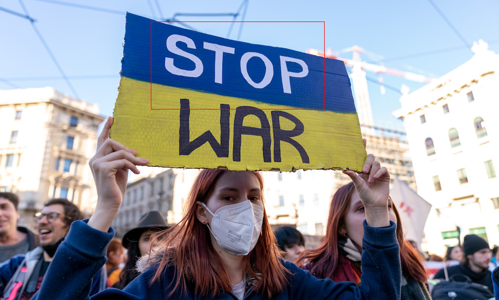

In [6]:
from ligavision.dsl import Image
result = Image(image_uri) | df.bbox[1]
result.to_image() * 0.5